In [15]:
import pandas as pd

In [16]:
from shapely.geometry import box, Polygon

In [17]:
import shapely

In [18]:
report_df = pd.read_json('final_annotation.json')

In [19]:
report_df.head()

,id,annotations,file_upload,drafts,predictions,data,meta,created_at,updated_at,project
0,151295,"[{'id': 111270, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119463],{'image': '/data/upload/cord/train/receipt_002...,{},2022-01-31 11:00:35.122760+00:00,2022-02-09 13:11:04.347499+00:00,469
1,151286,"[{'id': 111256, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119454],{'image': '/data/upload/cord/train/receipt_007...,{},2022-01-31 11:00:35.122522+00:00,2022-02-09 13:10:02.133616+00:00,469
2,151280,"[{'id': 111247, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119448],{'image': '/data/upload/cord/train/receipt_001...,{},2022-01-31 11:00:35.122364+00:00,2022-02-09 13:08:05.489795+00:00,469
3,151262,"[{'id': 111211, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119430],{'image': '/data/upload/cord/train/receipt_001...,{},2022-01-31 11:00:35.121883+00:00,2022-02-09 13:04:57.291210+00:00,469
4,151261,"[{'id': 111210, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119429],{'image': '/data/upload/cord/train/receipt_003...,{},2022-01-31 11:00:35.121856+00:00,2022-02-09 13:02:19.901145+00:00,469


In [20]:
names = [name['image'].split('/')[5] for name in report_df['data']]

In [21]:
changes = list()
for n in range(len(report_df['annotations'])):
    changed_obj = 0
    for i in range(len(report_df['annotations'][n][0]['result'])):
        r = report_df['annotations'][n][0]['result'][i]
        #работаем с объектами из предразметки
        if r['origin'] == 'prediction':
            pol1_xy = r['value']['points']
            polygon1_shape = shapely.geometry.Polygon(pol1_xy)
            IOUs = list()
            for k in range(len(report_df['annotations'][n][0]['prediction']['result'])):
                pol2_xy = report_df['annotations'][n][0]['prediction']['result'][k]['value']['points']
                polygon2_shape = shapely.geometry.Polygon(pol2_xy)
                polygon_intersection = polygon1_shape.intersection(polygon2_shape).area
                polygon_union = polygon1_shape.union(polygon2_shape).area
                IOU = polygon_intersection / polygon_union 
                IOUs.append(IOU)
            IOU = max(IOUs) # выбираем максимальный IOU
            if IOU < 0.97:
                changed_obj += 1
    changes.append(changed_obj)

In [22]:
len(changes)

456

In [23]:
creation_date = list()
finish_date = list()
creation_time = list()
finish_time = list()
lead_time = list()
ann_cd = list()
ann_fd = list()
for i in range(len(report_df['annotations'])):
    c_date = pd.Timestamp(report_df['annotations'][i][0]['created_at'])
    creation_date.append(c_date.date())
    creation_time.append(c_date.round('S').time())
    ann_cd.append(c_date)
    u_date = pd.Timestamp(report_df['annotations'][i][0]['updated_at'])
    finish_date.append(u_date.date())
    finish_time.append(u_date.round('S').time())
    lead_time.append(report_df['annotations'][i][0]['lead_time'])
    ann_fd.append(u_date)

In [24]:
datesdf = pd.DataFrame({'Name': names, 'ann_creation': ann_cd, 'ann_finish': ann_fd, 'task_creation': report_df['created_at'], 'task_finish': report_df['updated_at'], 'lead_time': lead_time})

In [25]:
datesdf

,Name,ann_creation,ann_finish,task_creation,task_finish,lead_time
0,receipt_00206.png,2022-02-07 14:04:36.650793+00:00,2022-02-09 13:11:04.322005+00:00,2022-01-31 11:00:35.122760+00:00,2022-02-09 13:11:04.347499+00:00,4982.595
1,receipt_00705.png,2022-02-07 13:48:19.045636+00:00,2022-02-09 13:10:02.110432+00:00,2022-01-31 11:00:35.122522+00:00,2022-02-09 13:10:02.133616+00:00,4920.391
2,receipt_00119.png,2022-02-07 13:42:27.858481+00:00,2022-02-09 13:08:05.467079+00:00,2022-01-31 11:00:35.122364+00:00,2022-02-09 13:08:05.489795+00:00,4803.707
3,receipt_00169.png,2022-02-07 12:45:10.410941+00:00,2022-02-09 13:04:57.167345+00:00,2022-01-31 11:00:35.121883+00:00,2022-02-09 13:04:57.291210+00:00,4615.451
4,receipt_00305.png,2022-02-07 12:44:50.221350+00:00,2022-02-09 13:02:19.873142+00:00,2022-01-31 11:00:35.121856+00:00,2022-02-09 13:02:19.901145+00:00,4458.149
...,...,...,...,...,...,...
451,receipt_00085.png,2022-01-31 17:16:37.249066+00:00,2022-01-31 17:16:37.249081+00:00,2022-01-31 11:00:35.118592+00:00,2022-01-31 17:16:37.275028+00:00,1693.473
452,receipt_00082.png,2022-01-31 16:28:57.472831+00:00,2022-01-31 16:28:57.472852+00:00,2022-01-31 11:00:35.118458+00:00,2022-01-31 16:28:57.503443+00:00,19.564
453,receipt_00016.png,2022-01-31 16:28:36.677103+00:00,2022-01-31 16:28:36.677120+00:00,2022-01-31 11:00:35.118431+00:00,2022-01-31 16:28:36.702045+00:00,26.114
454,receipt_00077.png,2022-01-31 16:26:34.114468+00:00,2022-01-31 16:26:34.114484+00:00,2022-01-31 11:00:35.118376+00:00,2022-01-31 16:26:34.141298+00:00,39.425


In [26]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates

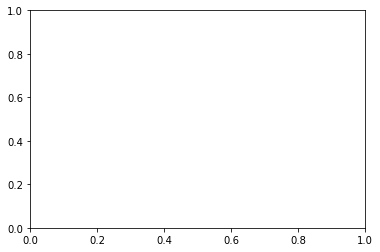

In [35]:
for i in range(len(datesdf)):
    x_ann = [datesdf['ann_creation'][i], datesdf['ann_finish'][i]]
    y_ann = [2, 2]
    x_task = [datesdf['task_creation'][i], datesdf['task_finish'][i]]
    y_task = [1, 1]
    dates_ann = dates.date2num(x_ann)
    dates_task = dates.date2num(x_task)
    plt.plot(dates_ann, y_ann, label = "annotation dates")
    plt.plot(dates_task, y_task, label = "task dates")
    plt.legend()
    plt.title(i)
    path = './time_intervals/' + datesdf['Name'][i]
    plt.savefig(path)
    plt.cla()

In [36]:
datesdf.iloc[455]

Name                            receipt_00021.png
ann_creation     2022-01-31 16:14:27.129585+00:00
ann_finish       2022-01-31 16:14:27.129601+00:00
task_creation    2022-01-31 11:00:35.118266+00:00
task_finish      2022-01-31 16:14:27.156542+00:00
lead_time                                   8.125
Name: 455, dtype: object

In [44]:
#еще раз проверяем, что annotation.created_at и annotation.updated_at находятся внутри интервала [created_at; updated_at]
with open("intervals_check.txt", 'w', encoding = 'utf-8') as f:
    for i in range(len(datesdf)):
        if datesdf.iloc[i].ann_creation >= datesdf.iloc[i].task_creation and datesdf.iloc[i].task_finish >= datesdf.iloc[i].ann_finish:
            f.write(str(i))
            f.write(str(True))
            f.write('\n')
        else:
            f.write(datesdf.iloc[i])
            f.write('\n')

In [47]:
with open("intervals_check_differences.txt", 'w', encoding = 'utf-8') as f:
    for i in range(len(datesdf)):
        if datesdf.iloc[i].lead_time != datesdf.iloc[i].ann_finish - datesdf.iloc[i].ann_creation:
            #print(i, datesdf.iloc[i].lead_time, (datesdf.iloc[i].ann_finish - datesdf.iloc[i].ann_creation).total_seconds())
            f.write(str(i) + ' lead time: ' + str(datesdf.iloc[i].lead_time) + ' date difference: ' + str((datesdf.iloc[i].ann_finish - datesdf.iloc[i].ann_creation).total_seconds()) + '\n')
        

Получилось, что lead_time никогда не равно разнице между временем начала работы и времением окончания работы. Более того, начиная с id=46, разность между временем окончания работы и временем начала работы получается очень маленькой. Поэтому ориентируемся на lead_time.

In [48]:
datesdf.iloc[46]

Name                            receipt_00002.png
ann_creation     2022-02-09 11:46:56.141022+00:00
ann_finish       2022-02-09 11:46:56.141038+00:00
task_creation    2022-01-31 11:00:35.130588+00:00
task_finish      2022-02-09 11:46:56.166687+00:00
lead_time                                  57.838
Name: 46, dtype: object

In [49]:
annotation_result = list()
annotation_prediction = list()
for i in range(len(report_df['annotations'])):
    annotation_result.append(len(report_df['annotations'][i][0]['result']))
    annotation_prediction.append(len(report_df['annotations'][i][0]['prediction']['result']))

In [50]:
data = {'name': names, 'resulting N of objects': annotation_result, 'initial N of objects': annotation_prediction, 'N of changed objects': changes, 'lead_time': lead_time, 'creation_date': creation_date, 'creation_time': creation_time, 'finish_date': finish_date, 'finish_time': finish_time}

In [51]:
data_df = pd.DataFrame.from_dict(data)

In [52]:
data_df.to_csv('report.csv', encoding='utf8')

In [53]:
data_df

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time
0,receipt_00206.png,43,28,0,4982.595,2022-02-07,14:04:37,2022-02-09,13:11:04
1,receipt_00705.png,19,12,5,4920.391,2022-02-07,13:48:19,2022-02-09,13:10:02
2,receipt_00119.png,18,13,4,4803.707,2022-02-07,13:42:28,2022-02-09,13:08:05
3,receipt_00169.png,22,16,1,4615.451,2022-02-07,12:45:10,2022-02-09,13:04:57
4,receipt_00305.png,22,17,0,4458.149,2022-02-07,12:44:50,2022-02-09,13:02:20
...,...,...,...,...,...,...,...,...,...
451,receipt_00085.png,19,15,2,1693.473,2022-01-31,17:16:37,2022-01-31,17:16:37
452,receipt_00082.png,30,30,0,19.564,2022-01-31,16:28:57,2022-01-31,16:28:57
453,receipt_00016.png,10,10,0,26.114,2022-01-31,16:28:37,2022-01-31,16:28:37
454,receipt_00077.png,23,22,0,39.425,2022-01-31,16:26:34,2022-01-31,16:26:34


In [54]:
data_df.describe()

,resulting N of objects,initial N of objects,N of changed objects,lead_time
count,456.000000,456.000000,456.000000,456.000000
mean,27.085526,23.785088,0.629386,362.797318
std,15.824842,15.061700,1.229997,912.064011
min,9.000000,7.000000,0.000000,3.463000
25%,17.000000,14.000000,0.000000,22.277000
50%,22.000000,19.000000,0.000000,53.429000
75%,34.250000,28.250000,1.000000,159.416000
max,123.000000,119.000000,8.000000,5430.260000


<b>Количество объектов после разметки:</b>
<br>Среднее арифметическое = 27.085526
<br>Минимальное количество объектов = 9
<br>Максимальное количество объектов = 123
<p><b>Количество исходных объектов:</b>
<br>Среднее арифметическое = 23.785088
<br>Минимальное количество объектов = 7
<br>Максимальное количество объектов = 119
<p><b>Количество измененных объектов:</b>
<br>Среднее арифметическое = 0.629386
<br>Минимальное количество объектов = 0
<br>Максимальное количество объектов = 8
<p><b>Время выполнения (в секундах):</b>
<br>Среднее арифметическое = 362.797318
<br>Минимальное затраченное время = 3.463000
<br>Максимальное затраченное время = 5430.260000

In [55]:
print('Медиана количества объектов после разметки = ', data_df['resulting N of objects'].median())
print('Медиана исходного количества объектов = ', data_df['initial N of objects'].median())
print('Медиана количества измененных объектов = ', data_df['N of changed objects'].median())
print('Медиана времени, затраченного на разметку = ', data_df['lead_time'].median())

Медиана количества объектов после разметки =  22.0
Медиана исходного количества объектов =  19.0
Медиана количества измененных объектов =  0.0
Медиана времени, затраченного на разметку =  53.429


Text(0.5, 1.0, 'Distribution of initial number of objects')

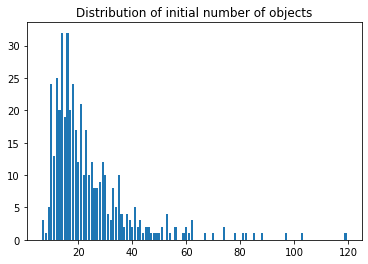

In [56]:
plt.bar(data_df['initial N of objects'].value_counts().keys(), data_df['initial N of objects'].value_counts().values)
plt.title('Distribution of initial number of objects')

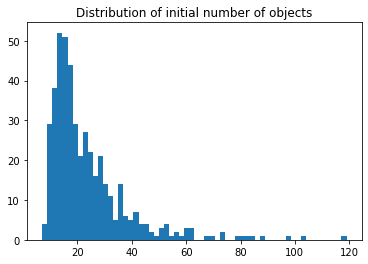

In [57]:
f,ax=plt.subplots()

ax.hist(data_df['initial N of objects'], bins = 60)
ax.set_title('Distribution of initial number of objects')


plt.show()

Распределение количества объектов в предразметке

Text(0.5, 1.0, 'Distribution of resulting number of objects')

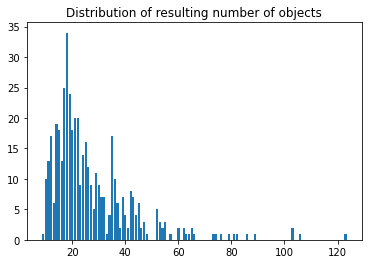

In [58]:
plt.bar(data_df['resulting N of objects'].value_counts().keys(), data_df['resulting N of objects'].value_counts().values)
plt.title('Distribution of resulting number of objects')

Распределение финального количества объектов

Text(0.5, 1.0, 'Distribution of modified objects')

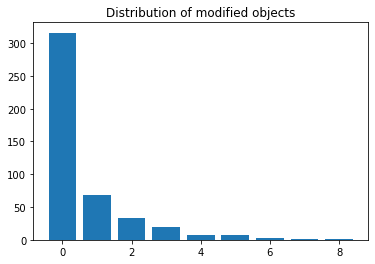

In [59]:
plt.bar(data_df['N of changed objects'].value_counts().keys(), data_df['N of changed objects'].value_counts().values)
plt.title('Distribution of modified objects')

Распределение количества измененных объектов.
<br> Можно посмотреть, сколько в общем было размечено объектов на документе, где наблюдается максимальное количество изменений.

In [60]:
data_df[data_df['N of changed objects'] >= 5]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time
1,receipt_00705.png,19,12,5,4920.391,2022-02-07,13:48:19,2022-02-09,13:10:02
10,receipt_00391.png,18,12,5,3879.918,2022-02-07,12:09:02,2022-02-09,12:52:42
15,receipt_00061.png,17,12,5,3281.645,2022-02-07,11:34:45,2022-02-09,12:42:43
126,receipt_00409.png,18,17,7,173.511,2022-02-09,07:09:30,2022-02-09,07:09:30
146,receipt_00609.png,22,17,5,389.025,2022-02-09,06:41:02,2022-02-09,06:41:02
174,receipt_00296.png,21,14,5,381.191,2022-02-08,11:32:11,2022-02-08,11:32:11
177,receipt_00629.png,19,19,5,77.331,2022-02-08,11:25:09,2022-02-08,11:25:09
182,receipt_00404.png,45,30,6,625.663,2022-02-08,10:44:42,2022-02-08,10:44:42
214,receipt_00291.png,17,12,5,130.686,2022-02-08,08:36:03,2022-02-08,08:36:03
319,receipt_00114.png,40,36,6,191.387,2022-02-07,14:42:39,2022-02-07,14:42:39


In [61]:
newobj_df = data_df['resulting N of objects'] - data_df['initial N of objects'] # количество добавленных / удаленных объектов

In [62]:
newobj_df.describe()

count    456.000000
mean       3.300439
std        4.319096
min       -1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       25.000000
dtype: float64

<b>Количество новых объектов:</b>
<br>Среднее арифметическое = 3.300439
<br>Минимальное количество объектов = -1 (т.е. объект был удален)
<br>Максимальное количество объектов = 25

In [63]:
print('Медиана количества новых объектов = ', newobj_df.median())

Медиана количества новых объектов =  2.0


Text(0.5, 1.0, 'Number of new objects')

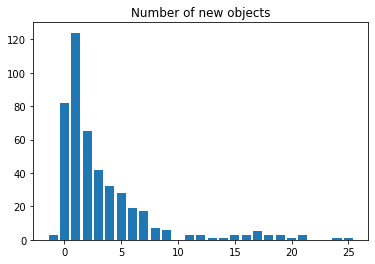

In [64]:
plt.bar(newobj_df.value_counts().keys(), newobj_df.value_counts().values)
plt.title('Number of new objects')

Распределение количества новых объектов

In [65]:
data2_df = data_df

In [66]:
# добавляем колонку с общим количеством изменений (модифицированные аннотации + добавленные объекты)
data2_df['overall_changes'] = newobj_df.abs() + data_df['N of changed objects'] 

In [67]:
data2_df['new_objects'] = newobj_df.abs()

In [68]:
data2_df.head()

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
0,receipt_00206.png,43,28,0,4982.595,2022-02-07,14:04:37,2022-02-09,13:11:04,15,15
1,receipt_00705.png,19,12,5,4920.391,2022-02-07,13:48:19,2022-02-09,13:10:02,12,7
2,receipt_00119.png,18,13,4,4803.707,2022-02-07,13:42:28,2022-02-09,13:08:05,9,5
3,receipt_00169.png,22,16,1,4615.451,2022-02-07,12:45:10,2022-02-09,13:04:57,7,6
4,receipt_00305.png,22,17,0,4458.149,2022-02-07,12:44:50,2022-02-09,13:02:20,5,5


In [69]:
data2_df['overall_changes'].describe()

count    456.000000
mean       3.942982
std        4.562272
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       26.000000
Name: overall_changes, dtype: float64

In [70]:

print('Медиана общего количества внесенных изменений = ', data2_df['overall_changes'].median())

Медиана общего количества внесенных изменений =  2.0


Text(0.5, 1.0, 'Distribution of overall changes')

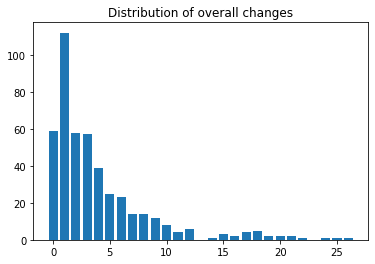

In [71]:
plt.bar(data2_df['overall_changes'].value_counts().keys(), data2_df['overall_changes'].value_counts().values)
plt.title('Distribution of overall changes')

Распределение общего количества внесенных изменений

В целом, можно говорить, что предразметка была достаточно эффективной: для 75% размеченных документов общее количество внесенных изменений (изменение объектов предразметки + добавление новых объектов) не превышает 5.

Text(0.5, 1.0, 'Lead time vs Resulting N of objects')

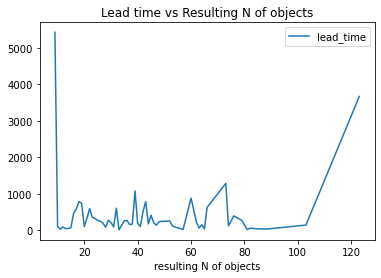

In [72]:
f,ax=plt.subplots(1)

data_df[['resulting N of objects','lead_time']].groupby(['resulting N of objects']).mean().plot(ax=ax)
ax.set_title('Lead time vs Resulting N of objects')

Зависимость затраченного времени от количества объектов в результирующей разметке

In [73]:
data_df[data_df['resulting N of objects'] == data_df['resulting N of objects'].min()]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
321,receipt_00791.png,9,7,0,5430.26,2022-02-07,14:33:06,2022-02-07,14:33:52,2,2


Text(0.5, 1.0, 'Lead time VS Initial N of objects')

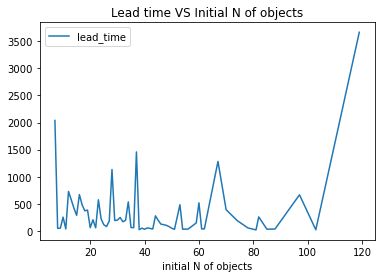

In [74]:
f,ax=plt.subplots(1)

data_df[['initial N of objects','lead_time']].groupby(['initial N of objects']).mean().plot(ax=ax)
ax.set_title('Lead time VS Initial N of objects')

Зависимость затраченного времени от количества объектов в исходной разметке

Text(0.5, 1.0, 'Lead time VS N of modified objects')

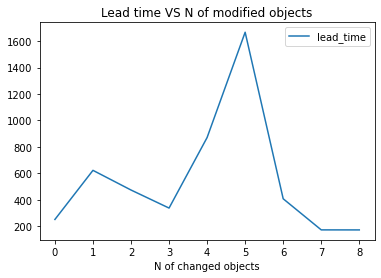

In [75]:
f,ax=plt.subplots(1)

data_df[['N of changed objects','lead_time']].groupby(['N of changed objects']).mean().plot(ax=ax)
ax.set_title('Lead time VS N of modified objects')

Зависимость затраченного времени от количества измененных объектов

Text(0.5, 1.0, 'Lead time VS Number of new objects')

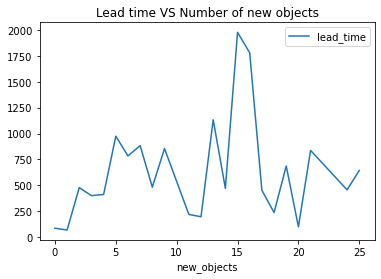

In [76]:
f,ax=plt.subplots(1)

data_df[['new_objects','lead_time']].groupby(['new_objects']).mean().plot(ax=ax)
ax.set_title('Lead time VS Number of new objects')

Зависимость затраченного времени от количества новых объектов

Text(0.5, 1.0, 'Lead time VS Number of overall changes')

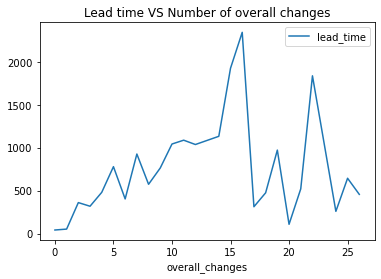

In [77]:
f,ax=plt.subplots(1)

data2_df[['overall_changes','lead_time']].groupby(['overall_changes']).mean().plot(ax=ax)
ax.set_title('Lead time VS Number of overall changes')

Зависимость затраченного времени от общего количества внесенных изменений 

В целом, наблюдается ожидаемая зависимость: чем больше изменений, там больше времени было затрачено. Однако, некоторые минимумы на последних трех графиках кажутся подозрительными. В частности overall changes = 17, 20, 24.

In [78]:
data2_df[(data2_df['overall_changes'] == 17) | (data2_df['overall_changes'] == 20) | (data2_df['overall_changes'] == 24) ]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
74,receipt_00013.png,44,25,1,115.237,2022-02-09,10:16:37,2022-02-09,10:16:37,20,19
206,receipt_00004.png,35,18,0,163.402,2022-02-08,08:46:19,2022-02-08,08:46:19,17,17
278,receipt_00224.png,36,19,0,520.284,2022-02-08,06:38:37,2022-02-08,06:38:37,17,17
290,receipt_00122.png,41,21,0,100.040,2022-02-08,06:13:18,2022-02-08,06:13:18,20,20
318,receipt_00544.png,103,82,3,258.539,2022-02-07,14:46:59,2022-02-07,14:46:59,24,21
330,receipt_00046.png,36,19,0,324.785,2022-02-07,14:11:22,2022-02-07,14:11:22,17,17
415,receipt_00056.png,42,25,0,240.846,2022-02-07,10:05:39,2022-02-07,10:05:39,17,17


In [79]:
rows = list(data2_df[(data2_df['overall_changes'] == 17) | (data2_df['overall_changes'] == 20) | (data2_df['overall_changes'] == 24) ].index)

In [80]:
report_df.iloc[rows]

,id,annotations,file_upload,drafts,predictions,data,meta,created_at,updated_at,project
74,151556,"[{'id': 112153, 'completed_by': 70, 'result': ...",0c2f7de0-cord_test.json,[],[119724],{'image': '/data/upload/cord/test/receipt_0001...,{},2022-01-31 11:00:35.129835+00:00,2022-02-09 10:16:37.477236+00:00,469
206,151424,"[{'id': 111515, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119592],{'image': '/data/upload/cord/train/receipt_000...,{},2022-01-31 11:00:35.126212+00:00,2022-02-08 08:46:19.104086+00:00,469
278,151352,"[{'id': 111412, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119520],{'image': '/data/upload/cord/train/receipt_002...,{},2022-01-31 11:00:35.124291+00:00,2022-02-08 06:38:36.557537+00:00,469
290,151340,"[{'id': 111381, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119508],{'image': '/data/upload/cord/train/receipt_001...,{},2022-01-31 11:00:35.123972+00:00,2022-02-08 06:13:18.197358+00:00,469
318,151312,"[{'id': 111297, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119480],{'image': '/data/upload/cord/train/receipt_005...,{},2022-01-31 11:00:35.123212+00:00,2022-02-07 14:46:58.870304+00:00,469
330,151300,"[{'id': 111276, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119468],{'image': '/data/upload/cord/train/receipt_000...,{},2022-01-31 11:00:35.122892+00:00,2022-02-07 14:11:22.369611+00:00,469
415,151194,"[{'id': 111039, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,"[{'id': 68493, 'user': 'darya@ya.ru', 'created...",[119362],{'image': '/data/upload/cord/train/receipt_000...,{},2022-01-31 11:00:35.120021+00:00,2022-02-07 10:05:39.374091+00:00,469


In [81]:
from matplotlib.patches import Polygon, Rectangle

In [82]:
#функция для отрисовки аннотаций
def draw_polygons(i, annotation_type):
    pols = list()
    rects = list()
    if annotation_type == 'result':
        for o in report_df['annotations'][i][0]['result']:
            if o['type'] == 'polygonlabels':
                y = np.array(o['value']['points'])
                p = Polygon(y, facecolor = 'g')
                pols.append(p)
            if o['type'] == 'rectanglelabels':
                x = o['value']['x']
                y = o['value']['y']
                w = o['value']['width']
                h = o['value']['height']
                a = o['value']['rotation']
                r = Rectangle((x,y), w,h,a, facecolor = 'r')
                rects.append(r)
    if annotation_type == 'prediction':
        for o in report_df['annotations'][i][0]['prediction']['result']:
            if o['type'] == 'polygonlabels':
                y = np.array(o['value']['points'])
                p = Polygon(y, facecolor = 'g')
                pols.append(p)
            if o['type'] == 'rectanglelabels':
                x = o['value']['x']
                y = o['value']['y']
                w = o['value']['width']
                h = o['value']['height']
                a = o['value']['rotation']
                r = Rectangle((x,y), w,h,a, facecolor = 'r')
                rects.append(r) 
    fig, ax = plt.subplots()
    for p in pols:
        ax.add_patch(p)
    for r in rects:
        ax.add_patch(r)

    ax.set_xlim([0,100])
    ax.set_ylim([0,100])
    ax.invert_yaxis() #так проще сопоставлять с картинками
    title = 'Row #' + str(i) + ', ' + annotation_type
    plt.title(title)
    plt.show()    

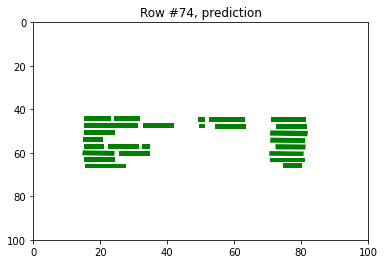

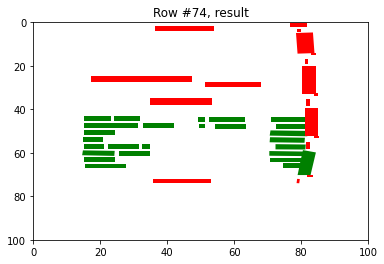

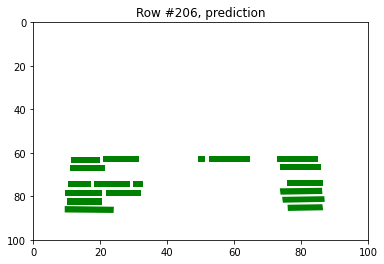

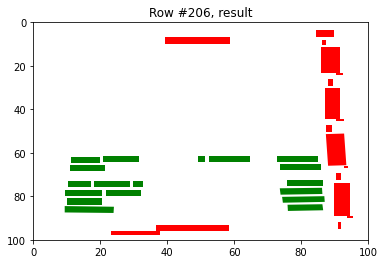

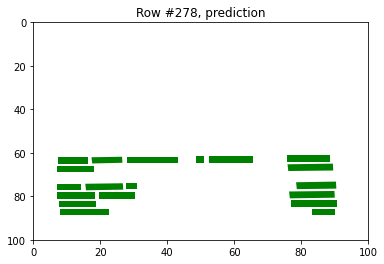

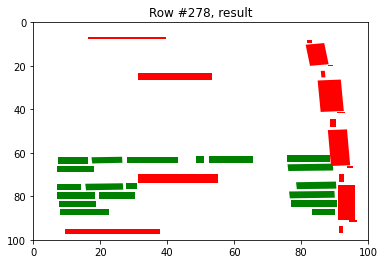

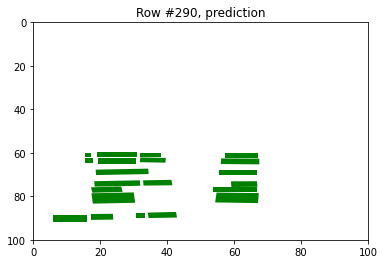

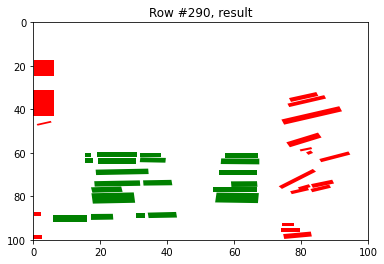

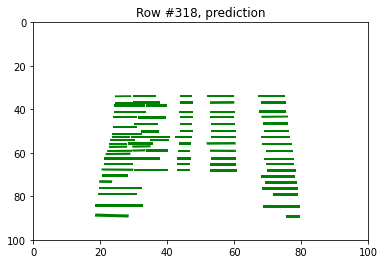

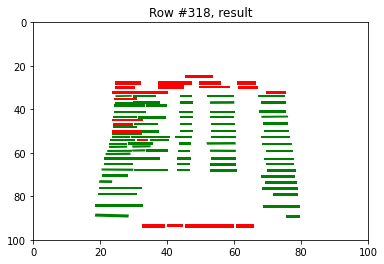

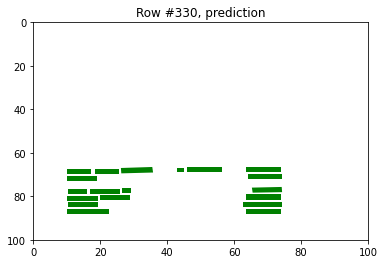

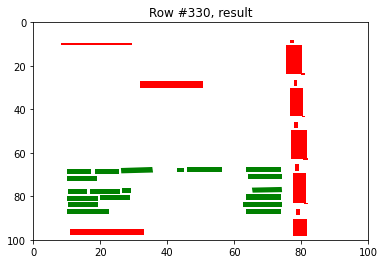

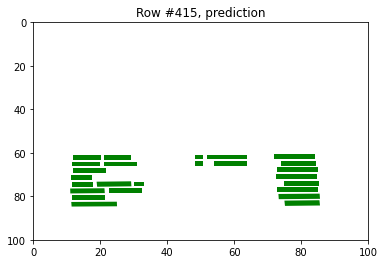

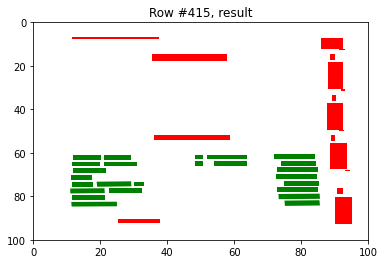

In [83]:
for row in rows:
    draw_polygons(row, 'prediction')
    draw_polygons(row, 'result')

Получается слишком много изменений за такой короткий промежуток времени, особенно по сравнению с временем, затраченным на разметку других документов.

Для сравнения - максимум графика в точке overall_changes = 16

In [84]:
data2_df[data2_df['overall_changes'] == 16]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
361,receipt_00702.png,45,29,0,155.32,2022-02-07,12:52:38,2022-02-07,12:52:38,16,16
425,receipt_00200.png,39,23,0,4532.78,2022-02-07,09:53:46,2022-02-07,09:53:46,16,16


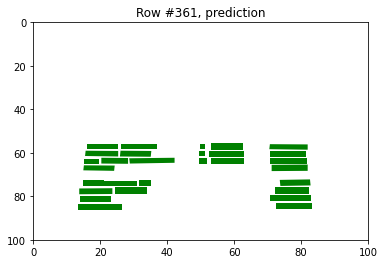

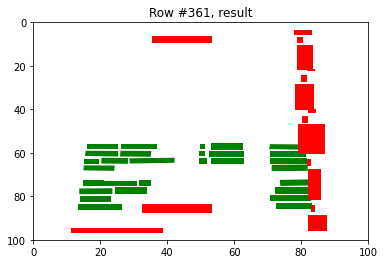

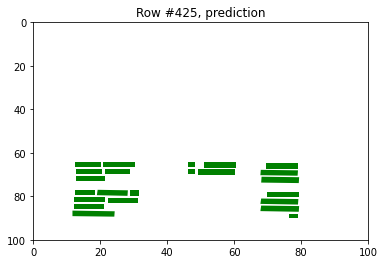

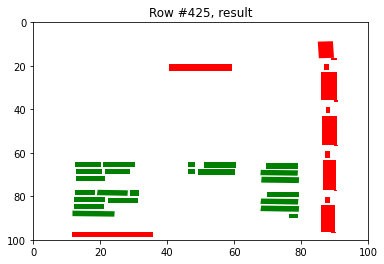

In [85]:
for i in list(data2_df[data2_df['overall_changes'] == 16].index):
    draw_polygons(i, 'prediction')
    draw_polygons(i, 'result')

В обоих случаях добавилось 16 новых объектов, но сильно различается время, затраченное на работу.

In [86]:
data2_df[data2_df['overall_changes'] == 25]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
93,receipt_00098.png,52,27,0,643.903,2022-02-09,08:26:05,2022-02-09,08:26:05,25,25


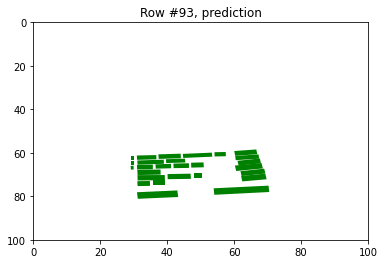

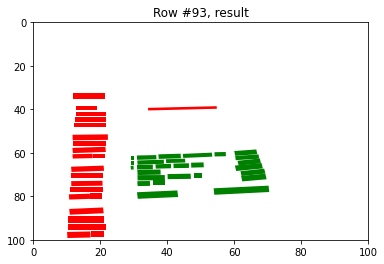

In [87]:
draw_polygons(93, 'prediction')
draw_polygons(93, 'result')

In [88]:
data2_df[data2_df['overall_changes'] == 22]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects
369,receipt_00016.png,35,14,1,1837.513,2022-02-07,12:41:38,2022-02-07,12:41:38,22,21


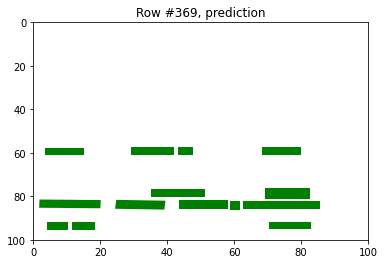

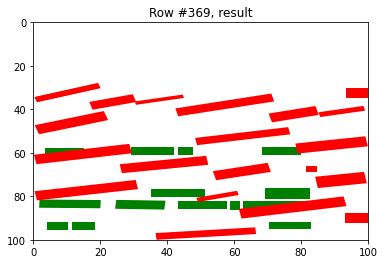

In [89]:
draw_polygons(369, 'prediction')
draw_polygons(369, 'result')

In [90]:
# вычисляем условную "скорость" разметки = количество объектов в результирующей разметке / на время, затраченное на разметку
pd.DataFrame(data_df['resulting N of objects'] / data_df['lead_time']).describe() 

,0
count,456.000000
mean,0.775286
std,1.013534
min,0.001657
25%,0.150021
50%,0.395115
75%,0.959631
max,8.067853


<b>Скорость разметки:</b>
<br>Среднее арифметическое = 0.775286 объектов/с
<br>Минимальная скорость = 0.001657 объектов/с
<br>Максимальная скорость = 8.067853 объектов/с

In [91]:
print('Медиана скорости разметки = ',(data_df['resulting N of objects'] / data_df['lead_time']).median())

Медиана скорости разметки =  0.3951145084732126


In [92]:
data2_df['speed'] = data_df['resulting N of objects'] / data_df['lead_time']

Рассчитываемая скорость - это очень условная величина, т.к. на самом деле скорость обработки объектов сильно зависит от их типа: объекты из предразметки, не требующие исправлений, обрабатываются очень быстро, в то время как добавление новых объектов и исправление имеющихся требует больше времени.

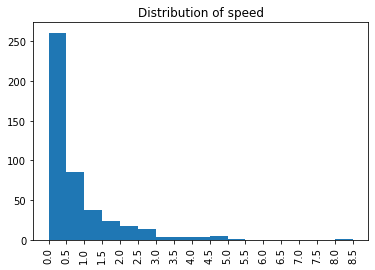

In [93]:
f,ax=plt.subplots()

ax.hist(data2_df['speed'], bins=np.arange(0, 9, step=0.5))
ax.set_title('Distribution of speed')
#x=list(range(0,10,1))
plt.xticks(np.arange(0, 9, step=0.5), rotation=90)

plt.show()

Посмотрим на минимум и максимумы скорости.

In [94]:
data2_df

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects,speed
0,receipt_00206.png,43,28,0,4982.595,2022-02-07,14:04:37,2022-02-09,13:11:04,15,15,0.008630
1,receipt_00705.png,19,12,5,4920.391,2022-02-07,13:48:19,2022-02-09,13:10:02,12,7,0.003861
2,receipt_00119.png,18,13,4,4803.707,2022-02-07,13:42:28,2022-02-09,13:08:05,9,5,0.003747
3,receipt_00169.png,22,16,1,4615.451,2022-02-07,12:45:10,2022-02-09,13:04:57,7,6,0.004767
4,receipt_00305.png,22,17,0,4458.149,2022-02-07,12:44:50,2022-02-09,13:02:20,5,5,0.004935
...,...,...,...,...,...,...,...,...,...,...,...,...
451,receipt_00085.png,19,15,2,1693.473,2022-01-31,17:16:37,2022-01-31,17:16:37,6,4,0.011220
452,receipt_00082.png,30,30,0,19.564,2022-01-31,16:28:57,2022-01-31,16:28:57,0,0,1.533429
453,receipt_00016.png,10,10,0,26.114,2022-01-31,16:28:37,2022-01-31,16:28:37,0,0,0.382936
454,receipt_00077.png,23,22,0,39.425,2022-01-31,16:26:34,2022-01-31,16:26:34,1,1,0.583386


In [95]:
data2_df[data2_df['speed'] == data2_df['speed'].max()]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects,speed
337,receipt_00744.png,39,39,0,4.834,2022-02-07,13:52:51,2022-02-07,13:52:51,0,0,8.067853


Максимум был достигнут на документе с большим количеством объектов и нулевым количеством изменений, что звучит разумно.

In [96]:
data2_df[data2_df['speed'] == data2_df['speed'].min()]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects,speed
321,receipt_00791.png,9,7,0,5430.26,2022-02-07,14:33:06,2022-02-07,14:33:52,2,2,0.001657


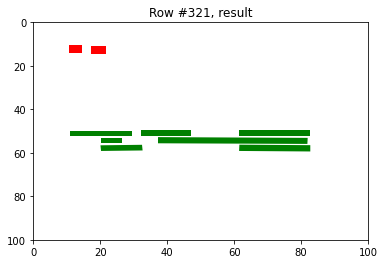

In [97]:
draw_polygons(321, 'result')

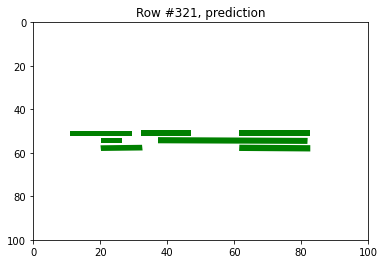

In [98]:
draw_polygons(321, 'prediction')

lead_time выглядит несколько странно, в этом примере более логичным временем исполнения выглядит разность finish_time - creation_time.

In [99]:
import cv2 as cv

In [100]:
import zipfile


In [102]:
archive = zipfile.ZipFile('images.zip', 'r')


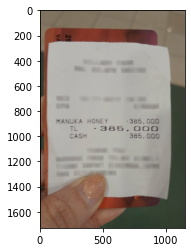

In [103]:
path = r'images/train/' + str(data2_df['name'][321])
img_data = archive.read(path)

img = cv.imdecode(np.frombuffer(img_data, np.uint8), 1)   

img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(img2)
#plt.xticks([]), plt.yticks([])  
plt.show()

Можно посмотреть на скорость собственно внесения изменений.

In [104]:
pd.DataFrame(data_df['overall_changes'] / data_df['lead_time']).describe() 

,0
count,456.000000
mean,0.041934
std,0.034426
min,0.000000
25%,0.009437
50%,0.038121
75%,0.066438
max,0.199920


<b>Скорость внесения изменений:</b>
<br>Среднее арифметическое = 0.041934 объектов/с (ср. с просто скоростью: 0.775286 объектов/с)
<br>Минимальная скорость = 0.000000 объектов/с (ср. 0.001657 объектов/с). В 0 ушла скорость на всех документах, где не вносились никакие изменения.
<br>Максимальная скорость = 0.199920 объектов/с (ср. 8.067853 объектов/с)

In [105]:
print('Медиана скорости внесения изменений:', (data_df['overall_changes'] / data_df['lead_time']).median() )

Медиана скорости внесения изменений: 0.03812143211387045


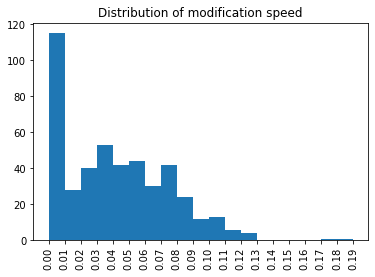

In [106]:
f,ax=plt.subplots()

ax.hist((data_df['overall_changes'] / data_df['lead_time']), bins=np.arange(0, 0.2, step=0.01))
ax.set_title('Distribution of modification speed')
plt.xticks(np.arange(0, 0.2, step=0.01), rotation=90)

plt.show()

In [107]:
data2_df['modification_speed'] = (data_df['overall_changes'] / data_df['lead_time'])

In [108]:
#посмотрим на скорость обработки документов, в которые не вносились изменения
data2_df[data2_df['modification_speed'] == 0]

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time,overall_changes,new_objects,speed,modification_speed
34,receipt_00032.png,12,12,0,698.487,2022-01-31,17:22:49,2022-02-09,11:59:40,0,0,0.017180,0.0
45,receipt_00017.png,12,12,0,372.097,2022-01-31,16:12:14,2022-02-09,11:47:36,0,0,0.032250,0.0
48,receipt_00080.png,15,15,0,7.602,2022-02-09,11:05:53,2022-02-09,11:05:53,0,0,1.973165,0.0
51,receipt_00096.png,18,18,0,33.188,2022-02-09,11:04:30,2022-02-09,11:04:30,0,0,0.542365,0.0
66,receipt_00045.png,27,27,0,21.329,2022-02-09,10:44:37,2022-02-09,10:44:37,0,0,1.265882,0.0
75,receipt_00044.png,10,10,0,3.463,2022-02-09,10:08:25,2022-02-09,10:08:25,0,0,2.887670,0.0
82,receipt_00084.png,24,24,0,15.112,2022-02-09,08:47:28,2022-02-09,08:47:28,0,0,1.588142,0.0
85,receipt_00007.png,16,16,0,8.033,2022-02-09,08:42:35,2022-02-09,08:42:35,0,0,1.991784,0.0
89,receipt_00027.png,17,17,0,9.597,2022-02-09,08:35:48,2022-02-09,08:35:48,0,0,1.771387,0.0
111,receipt_00151.png,14,14,0,9.763,2022-02-09,07:33:02,2022-02-09,07:33:02,0,0,1.433985,0.0


In [109]:
data2_df[data2_df['modification_speed'] == 0]['speed'].describe()

count    59.000000
mean      2.195478
std       1.638243
min       0.017180
25%       0.926071
50%       1.940299
75%       3.161812
max       8.067853
Name: speed, dtype: float64

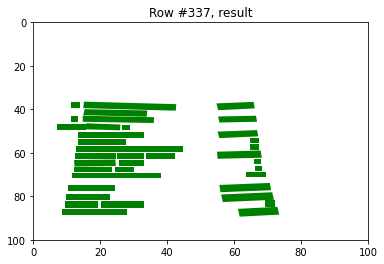

In [110]:
draw_polygons(337, 'result')

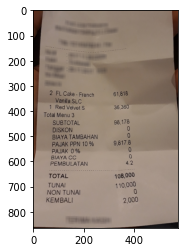

In [111]:
path = r'images/train/' + str(data2_df['name'][337])
img_data = archive.read(path)

img = cv.imdecode(np.frombuffer(img_data, np.uint8), 1)   

img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(img2)
#plt.xticks([]), plt.yticks([])  
plt.show()